Product Mix Optimization using Linear Programming

Problem Statement:
A factory manufactures two products: Product A and Product B.

Product A requires:
2 hours on Machine 1,
3 hours on Machine 2,
Profit $30/unit

Product B requires:
4 hours on Machine 1,
2 hours on Machine 2,
Profit $50/unit

Availability of Machine per Week:
Machine 1 : 100 hours,
Machine 2: 90 hours

Objective:
Maximize profit while satisfying machine time constraints.

In [1]:
!pip install pulp matplotlib

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.4 MB 3.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/16.4 MB 3.5 MB/s eta 0:00:05
   ----- ---------------------------------- 2.1/16.4 MB 3.6 MB/s eta 0:00:05
   ------- -------------------------------- 2.9/16.4 MB 3.7 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/16.4 MB 3.5 MB/s eta 0:00:04
   --------- ------------------------------ 3.9/16.4 MB 3.3 MB/s eta 0:00:04
   ---------- ----------------------------- 4.5/16.4 MB 3.2 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.4 MB 3.1 MB/s eta 0:00:04
   ------------- -------------------------- 5.5/16.4 MB 3.0 MB/s eta 0:00:04
   -------------- ------------------------- 6.0/16.4 MB 2.9 MB/s eta 0:00:04
   ---------------- ----------------------- 6.6/16.4 MB 2.9 MB/s eta 0:00:04
   ----------------- ---------------------- 7.1/16.4 MB 2.8 MB/s eta 0:00:04
   ---

In [2]:
from pulp import LpMaximize, LpProblem, LpVariable, value, PULP_CBC_CMD

# Define the model
model = LpProblem(name="product-mix", sense=LpMaximize)

# Decision variables
x = LpVariable(name="Product_A", lowBound=0, cat="Continuous")
y = LpVariable(name="Product_B", lowBound=0, cat="Continuous")

# Constraints
model += (2*x+4*y<=100, "Machine_1_hours")
model += (3*x+2*y<=90, "Machine_2_hours")

# Objective function
model += 30*x+50*y, "Total_Profit"

In [3]:
# Solve the model
model.solve(PULP_CBC_CMD(msg=False))

# Output results
print(f"Status: {model.status}")
print(f"Optimal number of Product A: {x.value()}")
print(f"Optimal number of Product B: {y.value()}")
print(f"Maximum Profit: ${value(model.objective)}")



Status: 1
Optimal number of Product A: 20.0
Optimal number of Product B: 15.0
Maximum Profit: $1350.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(0, 60, 400)
y1 = (100-2 * x_values)/4  # Machine 1 constraint
y2 = (90-3 * x_values)/2   # Machine 2 constraint

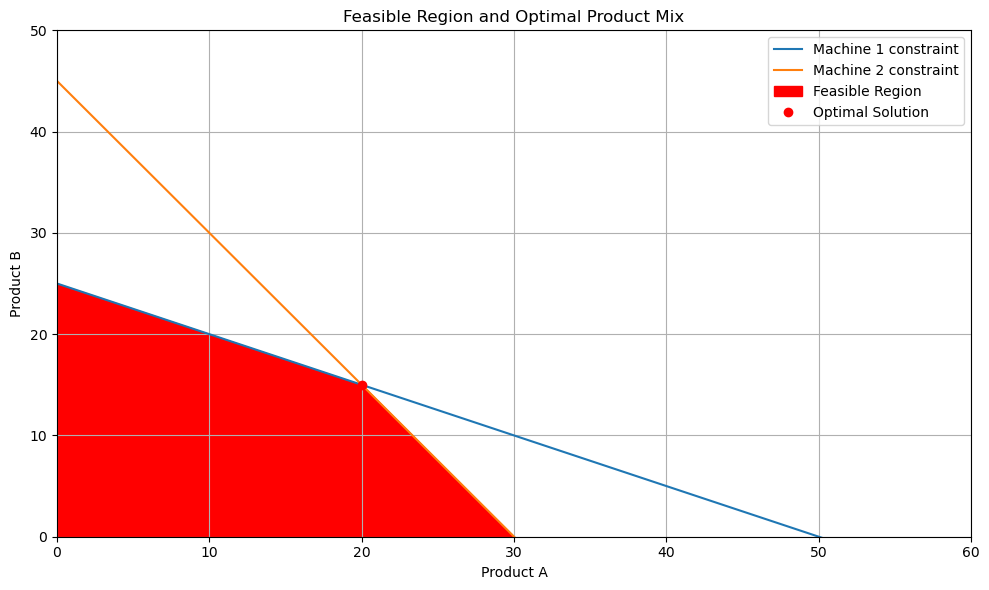

In [5]:
# Plotting the feasible region
plt.figure(figsize=(10, 6))
plt.plot(x_values, y1, label="Machine 1 constraint")
plt.plot(x_values, y2, label="Machine 2 constraint")
plt.xlim((0, 60))
plt.ylim((0, 50))

# Fill feasible region
plt.fill_between(x_values, np.minimum(y1, y2), where=(y1 >= 0) & (y2 >=0), color='red', label='Feasible Region')

# Mark the optimal point
plt.plot(x.value(), y.value(), 'ro', label='Optimal Solution')

plt.title("Feasible Region and Optimal Product Mix")
plt.xlabel("Product A")
plt.ylabel("Product B")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The optimal solution lies at the intersection of the constraints.
By producing the optimal number of Product A and B, the company utilizes its resources effeciently while maximizing profit.
